In [3]:
from helpers import * 

In [4]:
s3=s3_connection()
df=s3.get_tables_from_s3("aayrapetyan/diffusion/final_table.parquet")
df.sample(3)

connection successful


,total_voyageurs_2022,nom_gare,uic,codeinsee,lon_gare,lat_gare,codecommune,nomcommune,pop2022,revmoy2022,pbac2022,psup2022,dist_closest_station_km,nb_stations_same_commune,regions
1492,46325,Meurchin,87345272,62573,2.893090,50.497052,62573,MEURCHIN,3853.0,15129.355,0.466411,0.254511,1.844920,1,Hauts-de-France
2233,512188,Alès,87775288,30007,4.084948,44.127825,30007,ALES,38905.0,14034.807,0.399328,0.235597,10.015654,1,Occitanie
2075,226799,Paray-le-Monial,87694687,71342,4.113744,46.447312,71342,PARAY-LE-MONIAL,9176.0,16495.770,0.394661,0.237237,10.534332,1,Bourgogne-Franche-Comté


In [5]:
aggregated_stats = calculate(
    df,
    group=["regions"],
    fields=["total_voyageurs_2022", "pop2022", "revmoy2022", "pbac2022", "psup2022"],
    stats=["sum", "sum", "mean", "mean", "mean"],
    names=[
        "sum_voy_region",
        "sum_pop_region",
        "avg_rev_region",
        "avg_pbac_region",
        "avg_psup_region",
    ],
)
df = df.merge(aggregated_stats, on="regions", how="inner")

In [6]:
df.sample(1)

,total_voyageurs_2022,nom_gare,uic,codeinsee,lon_gare,lat_gare,codecommune,nomcommune,pop2022,revmoy2022,pbac2022,psup2022,dist_closest_station_km,nb_stations_same_commune,regions,sum_voy_region,sum_pop_region,avg_rev_region,avg_pbac_region,avg_psup_region
1847,1175632,Dax,87673202,40088,-1.050301,43.720472,40088,DAX,21638.0,17170.68,0.343655,0.219501,13.083912,1,Nouvelle-Aquitaine,67335302,3090545.0,16809.41033,0.430025,0.256224


In [7]:
df.columns

Index(['total_voyageurs_2022', 'nom_gare', 'uic', 'codeinsee', 'lon_gare',
       'lat_gare', 'codecommune', 'nomcommune', 'pop2022', 'revmoy2022',
       'pbac2022', 'psup2022', 'dist_closest_station_km',
       'nb_stations_same_commune', 'regions', 'sum_voy_region',
       'sum_pop_region', 'avg_rev_region', 'avg_pbac_region',
       'avg_psup_region'],
      dtype='object')

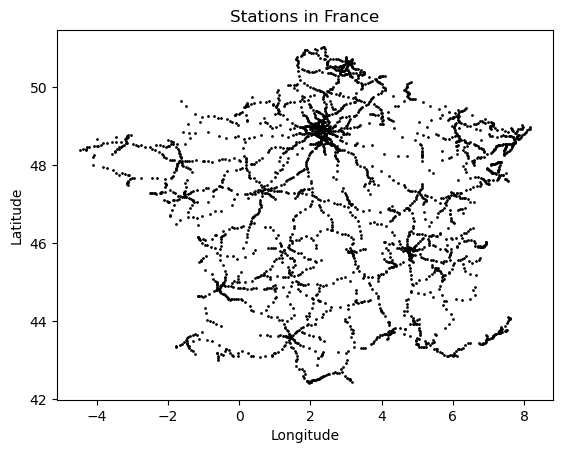

In [8]:
simple_plot_map(lat=df["lat_gare"],lon=df["lon_gare"])

nb removed observations :  18


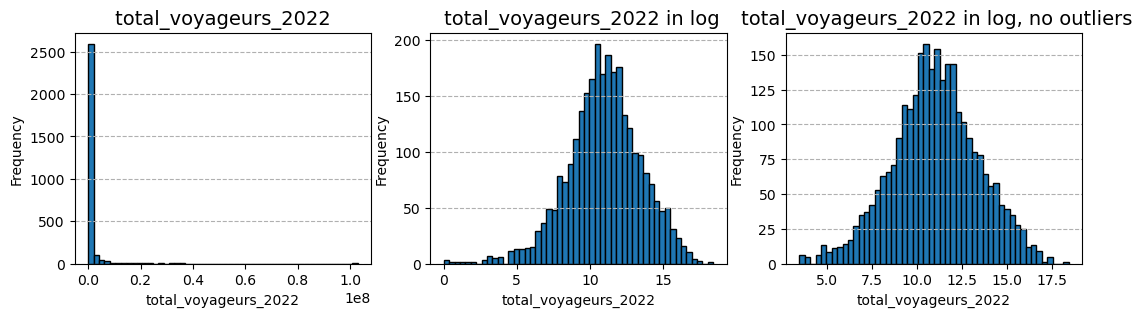

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))  # 3 rows, 1 column of plots
no_outliers_table=delete_outliers_z_score(df,np.log(df["total_voyageurs_2022"]))
plot_hist(axs[0], df['total_voyageurs_2022'], title_suffix="")
plot_hist(axs[1], np.log(df['total_voyageurs_2022']), title_suffix="in log")
plot_hist(axs[2], np.log(no_outliers_table['total_voyageurs_2022']), title_suffix="in log, no outliers")

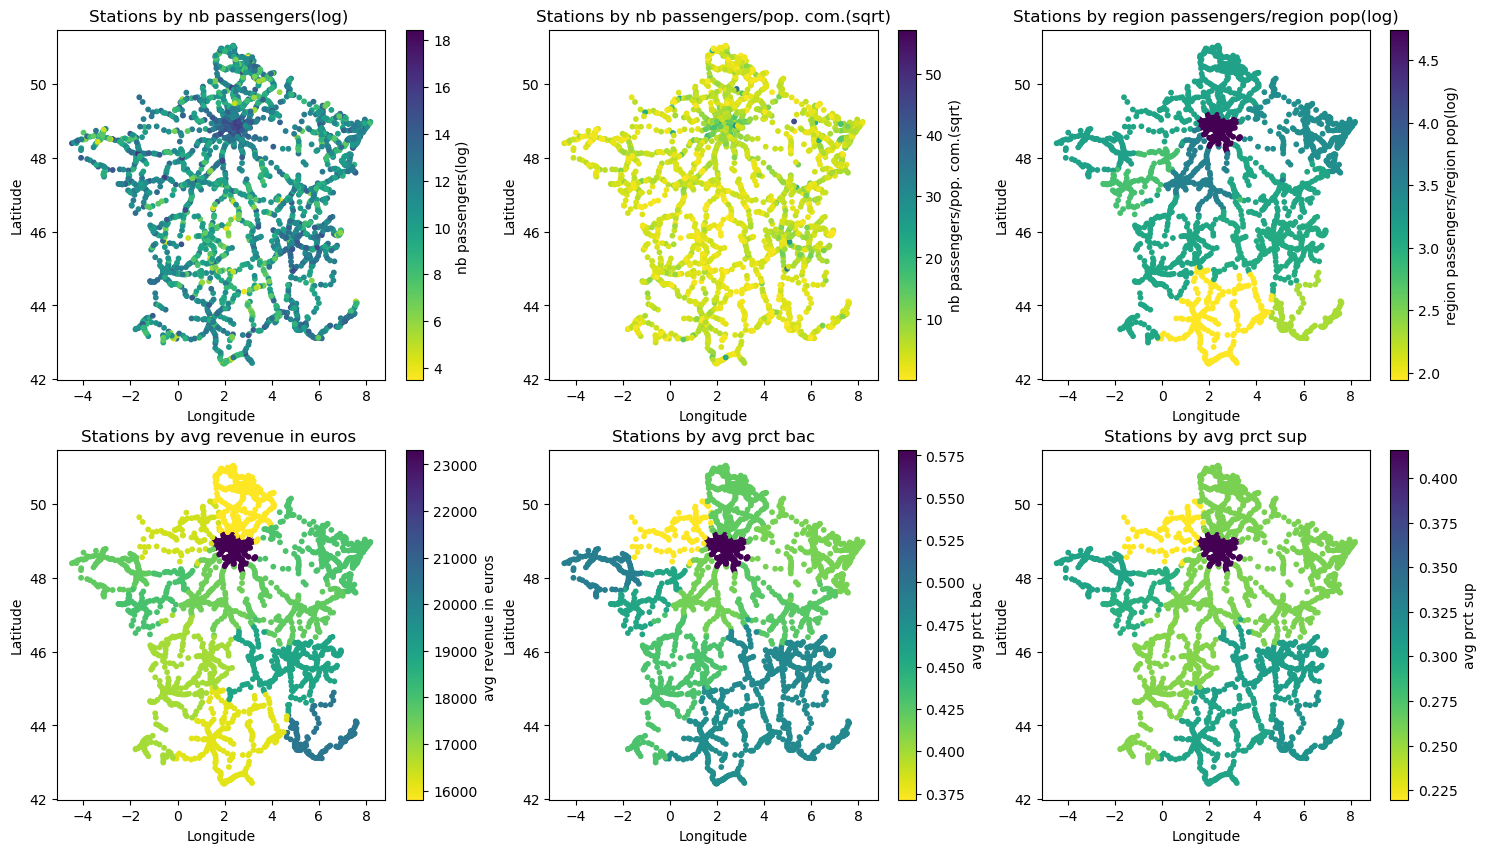

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 1 column of plots
suffix_description00="nb passengers(log) "
suffix_description01="nb passengers/pop. com.(sqrt)"
suffix_description02="region passengers/region pop(log)"
suffix_description10="avg revenue in euros "
suffix_description11="avg prct bac"
suffix_description12="avg prct sup"
plot_map_with_legend(axs[0,0], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.log(no_outliers_table['total_voyageurs_2022']),suffix_description=suffix_description00)
plot_map_with_legend(axs[0,1], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.sqrt(no_outliers_table['total_voyageurs_2022'] / no_outliers_table["pop2022"]),suffix_description=suffix_description01)
plot_map_with_legend(axs[0,2], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.log(no_outliers_table['sum_voy_region'] / no_outliers_table["sum_pop_region"]),suffix_description=suffix_description02)

plot_map_with_legend(axs[1,0], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], (no_outliers_table['avg_rev_region']),suffix_description=suffix_description10)
plot_map_with_legend(axs[1,1], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], no_outliers_table['avg_pbac_region'],suffix_description=suffix_description11)
plot_map_with_legend(axs[1,2], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], no_outliers_table['avg_psup_region'],suffix_description=suffix_description12)
